#CREDIT CARD APPROVAL

The project is about creating a prediction model for credit card approval for customers.

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, banks are rapidly taking a lot of outside data into account to enhance the calibre of credit judgments.

#Objectives
The objective of this project is to build a machine-learning model that accurately predicts credit card approval outcomes. The model can provide insights into the most important factors that impact credit card approval, allowing banks to make informed decisions quickly and accurately. This can result in a faster and more efficient credit card approval process, reducing the time and cost associated with manual credit assessment methods.

Overall, the proposed project has the potential to upgrade the credit card approval process, reduce manual effort and errors, and enhance the customer experience. This project demonstrates the potential of machine learning in automating and improving critical banking processes and can have significant benefits for banks and financial institutions in the global market.

#Dataset
Credit_card.csv

Ind_ID: Client ID
Gender: Gender information
Car_owner: Having a car or not
Propert_owner: Having property or not
Children: Count of children
Annual_income: Annual income
Type_Income: Income type
Education: Education level
Marital_status: Marital_status
Housing_type: Living sty
Birthday_count: Use backward count from the current day (0), -1 means yesterday.
Employed_days: Start date of employment. Use backward count from the current day (0). A positive value means the individual is currently unemployed.
Mobile_phone: Any mobile phone
Work_phone: Any work phone
Phone: Any phone number
EMAIL_ID: Any email ID
Type_Occupation: Occupation
Family_Members: Family size
Credit_card_label.csv

ID: The joining key between application data and credit status data, same is Ind_ID
Label: 0 is the application approved and 1 is the application rejected.
#Steps implemented to complete the project
##Data Preprocessing
In this step, two Excel files will be combined into a single file using pandas data frames. Later cleaning and preprocessing steps will be done to ensure its quality and suitability for data analysis.

EDA will be implemented. We will perform univariate and bivariate analysis.

##Feature engineering
After pre-processing the data, we would look for Handling outliers, encoding for categorical variables, feature scaling and feature selection.
##Machine Learning Algorithms

Here ML Algorithms will be applied. Looking at the problem statement with the categorial features involved, classification algorithms can be used. Logistic regression , Gradient boosting, Decision Tree.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:

!gdown 1pTkqXfUVH5NuT9CxvKpggOk9w_RQdfps

Downloading...
From: https://drive.google.com/uc?id=1pTkqXfUVH5NuT9CxvKpggOk9w_RQdfps
To: /content/Credit_card.csv
100% 187k/187k [00:00<00:00, 86.7MB/s]


In [ ]:
application_data = pd.read_csv('Credit_card.csv')

In [ ]:
# Initial inspection
print(application_data.head())
print(application_data.info())
print(application_data.describe())

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

In [ ]:
!gdown 1Aj46EiwMga2yS55FIMCLkjBdtdSvmiH5

Downloading...
From: https://drive.google.com/uc?id=1Aj46EiwMga2yS55FIMCLkjBdtdSvmiH5
To: /content/Credit_card_label.csv
100% 17.0k/17.0k [00:00<00:00, 44.6MB/s]


In [ ]:
label_data = pd.read_csv('Credit_card_label.csv')

In [ ]:
# Initial inspection
print(label_data.head())
print(label_data.info())


    Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB
None


In [ ]:
data = pd.merge(application_data, label_data, left_on='Ind_ID', right_on='Ind_ID')

# Drop the redundant 'ID' column
data.drop('Ind_ID', axis=1, inplace=True)

# Explore the data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  EMAIL_ID         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
 17  label         

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


##Hypothesis: Applicants with higher and more stable income types (e.g., salaried) are more likely to be approved for a credit card.

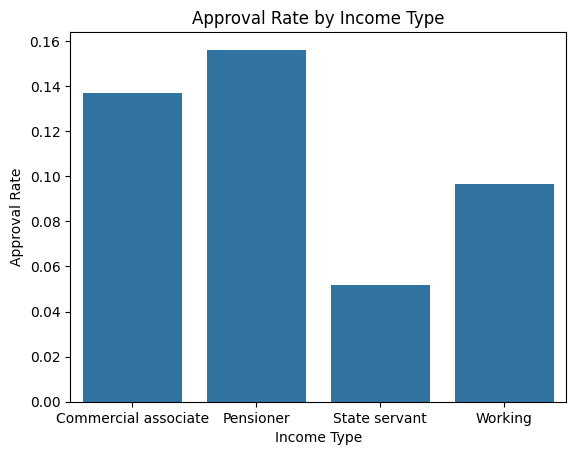

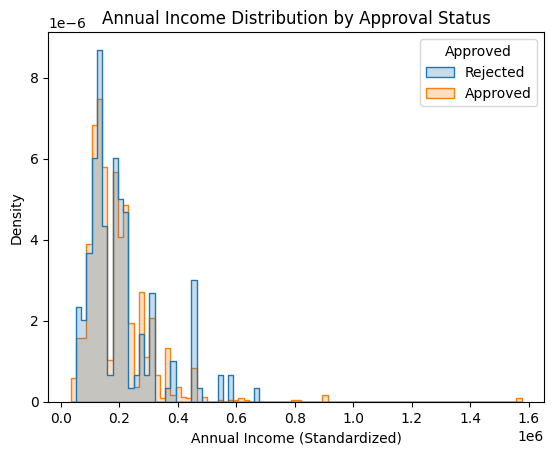

In [ ]:
# Plot income type vs. approval rate
income_approval = data.groupby('Type_Income')['label'].mean().reset_index()
sns.barplot(x='Type_Income', y='label', data=income_approval)
plt.title('Approval Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Approval Rate')
plt.show()

# Plot annual income vs. approval rate
data['Approved'] = data['label'].apply(lambda x: 'Approved' if x == 0 else 'Rejected')
sns.histplot(data, x='Annual_income', hue='Approved', element='step', stat='density', common_norm=False)
plt.title('Annual Income Distribution by Approval Status')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Density')
plt.show()

##RESULT- It can be seen that the income is not directly propotional to loan approval, it can be due to reasons like asking for larger loans, bad credit history

##Hypothesis: Certain demographic factors, such as being married and owning property, positively influence credit card approval chances.

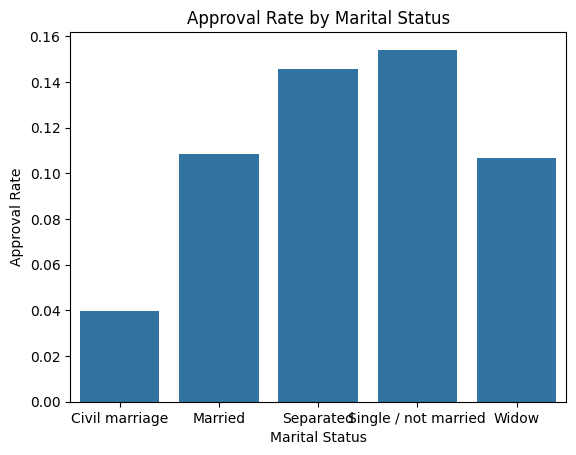

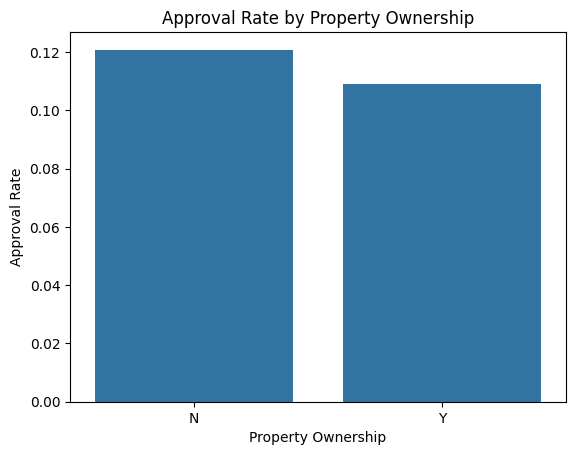

In [ ]:
# Plot marital status vs. approval rate
marital_approval = data.groupby('Marital_status')['label'].mean().reset_index()
sns.barplot(x='Marital_status', y='label', data=marital_approval)
plt.title('Approval Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Approval Rate')
plt.show()

# Plot property ownership vs. approval rate
property_approval = data.groupby('Propert_Owner')['label'].mean().reset_index()
sns.barplot(x='Propert_Owner', y='label', data=property_approval)
plt.title('Approval Rate by Property Ownership')
plt.xlabel('Property Ownership')
plt.ylabel('Approval Rate')
plt.show()

##Result : It can be said that the hypothesis is more or less true but there is not very strong substantiation of hypothesis

##Hypothesis: Applicants with longer employment history and current employment are more likely to be approved for a credit card.

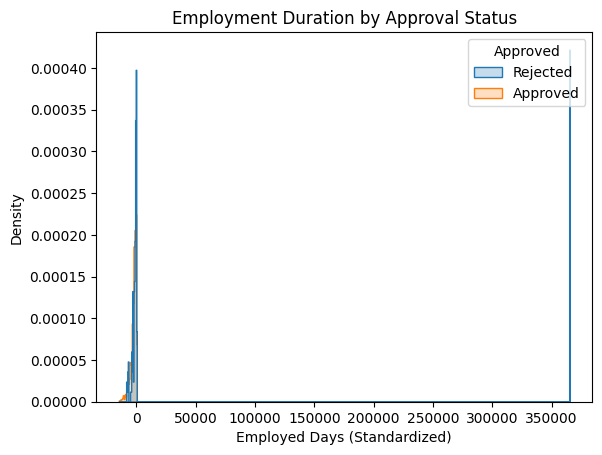

In [ ]:
# Plot employment days vs. approval rate
sns.histplot(data, x='Employed_days', hue='Approved', element='step', stat='density', common_norm=False)
plt.title('Employment Duration by Approval Status')
plt.xlabel('Employed Days (Standardized)')
plt.ylabel('Density')
plt.show()

Result- The hypothesis holds true


In [ ]:
# Data Cleaning
# 1. Remove rows with null GENDER values
data = data.dropna(subset=['GENDER'])

# 2. Impute missing values in Annual_income with the median value
annual_income_median = data['Annual_income'].median()
data['Annual_income'].fillna(annual_income_median, inplace=True)

# 3. Impute missing values in Birthday_count with the median value
birthday_count_median = data['Birthday_count'].median()
data['Birthday_count'].fillna(birthday_count_median, inplace=True)

# 4. Impute missing values in Type_Occupation with "not declared"
data['Type_Occupation'].fillna('not declared', inplace=True)

# Display the first few rows of the preprocessed data
print(data.head())



# Feature Engineering
data['Age'] = data['Birthday_count'].apply(lambda x: -x//365)
data['Employment_Length'] = data['Employed_days'].apply(lambda x: -x)



  GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0       162000.0   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   


<ipython-input-12-978c1f7bfcea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual_income'].fillna(annual_income_median, inplace=True)
<ipython-input-12-978c1f7bfcea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Birthday_count'].fillna(birthday_count_median, inplace=True)
<ipython-input-12-978c1f7bfcea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type_Occupation'].fillna('not declared', inplace=True)
<

In [ ]:
# Save the preprocessed data to a new CSV file ( for sql queries)
data.to_csv('Preprocessed_Credit_Card.csv', index=False)

In [ ]:
# Label Encoding
label_encoders = {}
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Feature Selection
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Age', 'Employment_Length']
X = data[features]
y = data['label']



In [ ]:


# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:

# Model Building
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{model_name} Classification Report:\n {classification_report(y_test, y_pred)}')
    print(f'{model_name} ROC AUC Score: {roc_auc_score(y_test, y_pred)}\n')



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Accuracy: 0.9061488673139159
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       280
           1       0.00      0.00      0.00        29

    accuracy                           0.91       309
   macro avg       0.45      0.50      0.48       309
weighted avg       0.82      0.91      0.86       309

Logistic Regression ROC AUC Score: 0.5

Decision Tree Accuracy: 0.8932038834951457
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       280
           1       0.44      0.48      0.46        29

    accuracy                           0.89       309
   macro avg       0.69      0.71      0.70       309
weighted avg       0.90      0.89      0.90       309

Decision Tree ROC AUC Score: 0.7092364532019705

Random Forest Accuracy: 0.9255663430420712
Random Forest Classification Report:
   

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  #
}

param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Logistic Regression
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)

# Initialize GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV for Logistic Regression
grid_search_logistic.fit(X_train, y_train)
best_logistic = grid_search_logistic.best_estimator_

# Fit GridSearchCV for Decision Tree
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

# Print the best parameters and ROC AUC scores
print(f'Best Logistic Regression Parameters: {grid_search_logistic.best_params_}')
print(f'Best Decision Tree Parameters: {grid_search_tree.best_params_}')



Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


Tuned Logistic Regression - Accuracy: 0.91, ROC AUC: 0.50
Tuned Decision Tree - Accuracy: 0.88, ROC AUC: 0.56
Random Forest - Accuracy: 0.93, ROC AUC: 0.67
Gradient Boosting - Accuracy: 0.90, ROC AUC: 0.53


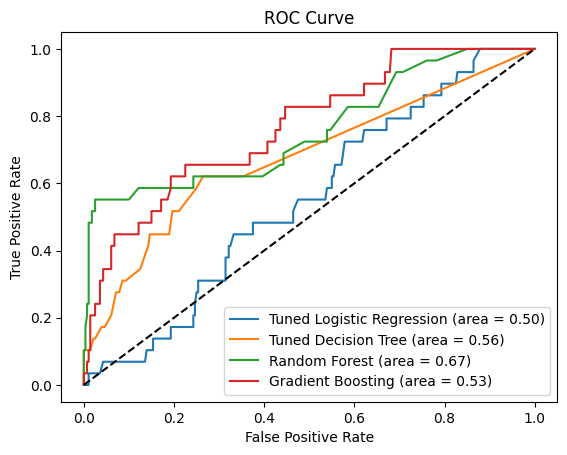

In [ ]:
# Evaluate the tuned models
models = {
    'Tuned Logistic Regression': best_logistic,
    'Tuned Decision Tree': best_tree,
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')

    # Plot ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


##it is clear that after performing hyperparameter tuning the random forest model performs best.  the tuned models  perform better than the initial models where decision tree had the  highest accuraccy of 0.70 against the tuned model where decision tree accuracy improved to 0.88 and random forest performed best at 0.93